## There Are Three Techniques To Handle The Missing Data

1. We will DELETE the Records which has missing values
2. We will create a SEPERATE MODEL to handle the missing values
3. We will use some Statistical methods like MEAN, MEDIAN, MODE

#### 1. If we have a record/row which has multiple NaN values, then we simply remove that row or delete the row.

- This step should be followed ONLY when we have a huge dataset.
- In case of smaller dataset, do not use this method

#### 2. Creating a Seperate Model: 

1. It takes Much more time and computational cost
2. Suppose there are 5 features, f1,f2,f3,f4,f5
3. F5 is the dependent feature and rest all are the independent features
4. first we create a seperate model for f1.
5. All the records or rows where f1 is NaN is taken as the test data. And remaining records are taken as train data.
6. Now we create a seperate model where F2,f3,f4 and f5 are given as independent features and we try to predict f1.
7. Then we give the test data to the model and predict the values of missing f1.
8. This is a very lengthy process as same method needs to be followed for all the features.

##### This method can be used if the number of columns are less.

#### 3. Statistical Method (Mean, Median, Mode)[BEST METHOD]:

## Practical Application: Logistic Regression On Titanic Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/Titanic problem/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

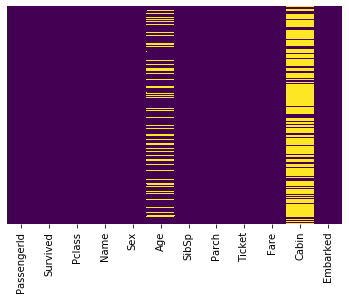

In [5]:
# Checking the null values using visualization

import seaborn as sns
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "viridis")

- We see that Age feature and Cabin feature has alot of null values.

- We will replace the NaN values in Age with some other values.
- We will not replace the values with mean or median of age directly as the value obtained will not be accurate. Hence we will also take into consideration some other features before applying any statistical method.

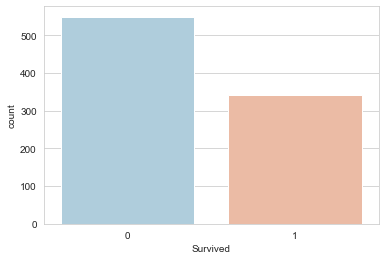

In [7]:
# Count plot of people who survived and died

sns.set_style("whitegrid")
sns.countplot(data = data, x = "Survived", palette = "RdBu_r")

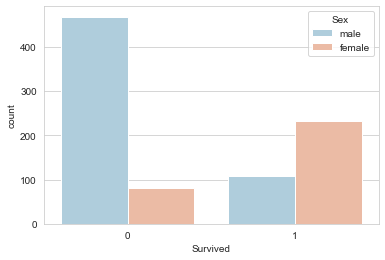

In [8]:
# Countplot of male and female who survived

sns.countplot(data = data, x = "Survived", hue = "Sex", palette = "RdBu_r")

### Majority of Female have Survived

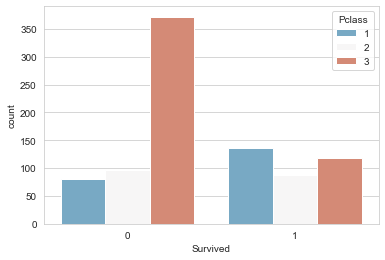

In [10]:
# Countplot of PClass who survived

sns.countplot(data = data, x = "Survived", hue = "Pclass", palette = "RdBu_r")

### Majority people from Class 1 have Survived

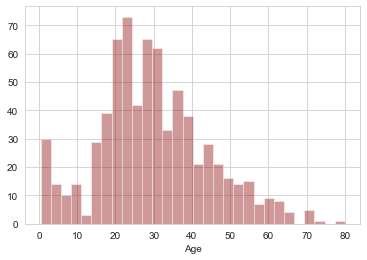

In [12]:
## Distplot of Age

sns.distplot(data["Age"].dropna(), kde = False, color = "darkred", bins = 30)

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

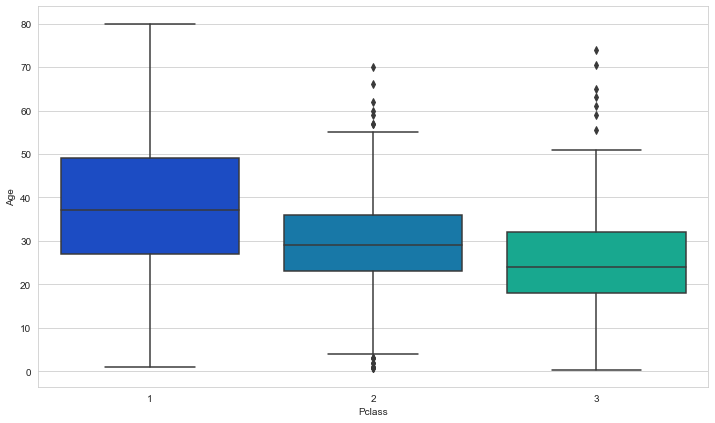

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

- Mean age of class 1 is 37
- Mean age of class 2 is 29
- Mean age of class 3 is 24

### Hence we will replace the NaN value of Age by the mean values but based on the Pclass

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
# applying the function

data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

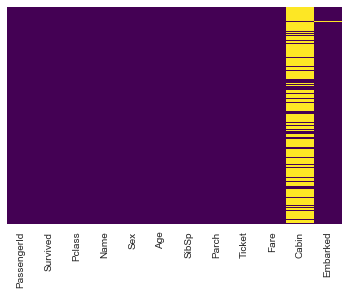

In [17]:
# Checking the heatmap again
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### More than 90% of Cabin Data is missing. Hence we will drop that Feature!!

In [18]:
data = data.drop("Cabin", axis = 1)

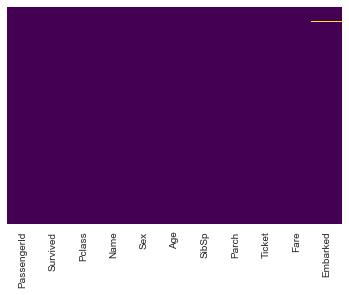

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
!pip install cufflinks

  Stored in directory: C:\Users\Ashish\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks


In [22]:
import cufflinks as cf
cf.go_offline()

F:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [24]:
data['Fare'].iplot(kind='hist',bins=30,color='green')